# MULTIPLE LINEAR REGRESSION

## Assignment Task:
### Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
## Dataset Description:
### The dataset consists of the following variables:
### Age: Age in years
### KM: Accumulated Kilometers on odometer
### FuelType: Fuel Type (Petrol, Diesel, CNG)
### HP: Horse Power
### Automatic: Automatic ( (Yes=1, No=0)
### CC: Cylinder Volume in cubic centimeters
### Doors: Number of doors
### Weight: Weight in Kilograms
### Quarterly_Tax: 
### Price: Offer Price in EUROs

### Taskes:

#### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [29]:
import pandas as pd

df = pd.read_csv('ToyotaCorolla - MLR.csv')

print(df.info())  
print(df.head())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950    

In [30]:
print(df.describe())
print(df.isnull().sum())  

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [31]:
df = pd.get_dummies(df, drop_first=True)
print(df.head())


   Price  Age_08_04     KM  HP  Automatic    cc  Doors  Cylinders  Gears  \
0  13500         23  46986  90          0  2000      3          4      5   
1  13750         23  72937  90          0  2000      3          4      5   
2  13950         24  41711  90          0  2000      3          4      5   
3  14950         26  48000  90          0  2000      3          4      5   
4  13750         30  38500  90          0  2000      3          4      5   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165              True             False  
1    1165              True             False  
2    1165              True             False  
3    1165              True             False  
4    1170              True             False  


#### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop("Price", axis=1) 
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1148, 11) (1148,)
Testing set shape: (288, 11) (288,)


#### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

### Train the First MLR Model (Baseline Model)
#### This model includes all available features without any modifications.

In [33]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

mlr1 = LinearRegression()

mlr1.fit(X_train, y_train)

print("Intercept:", mlr1.intercept_)
print("Coefficients:", dict(zip(X.columns, mlr1.coef_)))

y_pred1 = mlr1.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1 - MSE:", mse1)
print("Model 1 - R² Score:", r2_1)

Intercept: -14255.38599356528
Coefficients: {'Age_08_04': -120.83045817097111, 'KM': -0.01623141061267425, 'HP': 14.039478769759182, 'Automatic': 148.830926911819, 'cc': -0.03037219460702696, 'Doors': -60.31097437498874, 'Cylinders': 3.694822225952521e-13, 'Gears': 551.6007102659822, 'Weight': 25.8849583132745, 'Fuel_Type_Diesel': -68.54875675828563, 'Fuel_Type_Petrol': 1370.8089098159799}
Model 1 - MSE: 2203043.8231437034
Model 1 - R² Score: 0.8348888040611082


### Train the Second Model (Feature Selection)
#### This model removes low-importance features.

In [34]:
print(X_train.columns)


Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')


In [35]:
selected_features = ['Age_08_04', 'KM', 'HP']  
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

mlr2 = LinearRegression()
mlr2.fit(X_train_selected, y_train)

y_pred2 = mlr2.predict(X_test_selected)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Model 2 - MSE:", mse2)
print("Model 2 - R² Score:", r2_2)


Model 2 - MSE: 2530780.779833928
Model 2 - R² Score: 0.8103259513824549


### Train the Third Model (Polynomial Regression)
#### This model includes polynomial terms to capture non-linear relationships.

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

mlr3 = LinearRegression()
mlr3.fit(X_train_poly, y_train)

y_pred3 = mlr3.predict(X_test_poly)

mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 3 - MSE:", mse3)
print("Model 3 - R² Score:", r2_3)


Model 3 - MSE: 3190493.174914451
Model 3 - R² Score: 0.7608825851710554


#### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n {model_name} Performance:")
    print(f" Mean Squared Error (MSE): {mse:.4f}")
    print(f" Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f" Mean Absolute Error (MAE): {mae:.4f}")
    print(f" R² Score: {r2:.4f}")

evaluate_model(y_test, y_pred1, "Model 1: Baseline")

evaluate_model(y_test, y_pred2, "Model 2: Feature Selection")

evaluate_model(y_test, y_pred3, "Model 3: Polynomial Regression")



 Model 1: Baseline Performance:
 Mean Squared Error (MSE): 2203043.8231
 Root Mean Squared Error (RMSE): 1484.2654
 Mean Absolute Error (MAE): 990.8873
 R² Score: 0.8349

 Model 2: Feature Selection Performance:
 Mean Squared Error (MSE): 2530780.7798
 Root Mean Squared Error (RMSE): 1590.8428
 Mean Absolute Error (MAE): 1111.5418
 R² Score: 0.8103

 Model 3: Polynomial Regression Performance:
 Mean Squared Error (MSE): 3190493.1749
 Root Mean Squared Error (RMSE): 1786.1952
 Mean Absolute Error (MAE): 908.6825
 R² Score: 0.7609


#### 5.Apply Lasso and Ridge methods on the model.

In [38]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

### Apply Ridge Regression

In [39]:
ridge_model = Ridge(alpha=1.0) 

ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

evaluate_model(y_test, y_pred_ridge, "Ridge Regression")



 Ridge Regression Performance:
 Mean Squared Error (MSE): 2199746.3702
 Root Mean Squared Error (RMSE): 1483.1542
 Mean Absolute Error (MAE): 990.7338
 R² Score: 0.8351


### Apply Lasso Regression

In [40]:
lasso_model = Lasso(alpha=0.1)  

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

evaluate_model(y_test, y_pred_lasso, "Lasso Regression")



 Lasso Regression Performance:
 Mean Squared Error (MSE): 2202270.2600
 Root Mean Squared Error (RMSE): 1484.0048
 Mean Absolute Error (MAE): 990.8940
 R² Score: 0.8349


## Interview Questions:
### 1.What is Normalization & Standardization and how is it helpful?


#### Normalization (Min-Max Scaling)
#### Definition: Scales data to a fixed range, usually [0,1] or [-1,1].
#### Formula:
    #### 𝑋′=𝑋−𝑋𝑚𝑖𝑛/𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛

#### Standardization (Z-Score Scaling)
#### Definition: Transforms data to have zero mean (μ = 0) and unit variance (σ² = 1).
#### Formula:
    #### 𝑋′=𝑋−𝜇/𝜎

#### Both Normalization and Standardization are feature scaling techniques used in Machine Learning to bring numerical variables into a common scale. This improves model performance, especially for algorithms that are sensitive to scale.

### 2.What techniques can be used to address multicollinearity in multiple linear regression?

#### Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. This can lead to unstable coefficients, making it difficult to determine the true effect of each predictor.

# Resubmission Work

## Feature Selection Techniques

### Correlation-Based Selection
#### Calculate the correlation matrix and drop features highly correlated with each other.

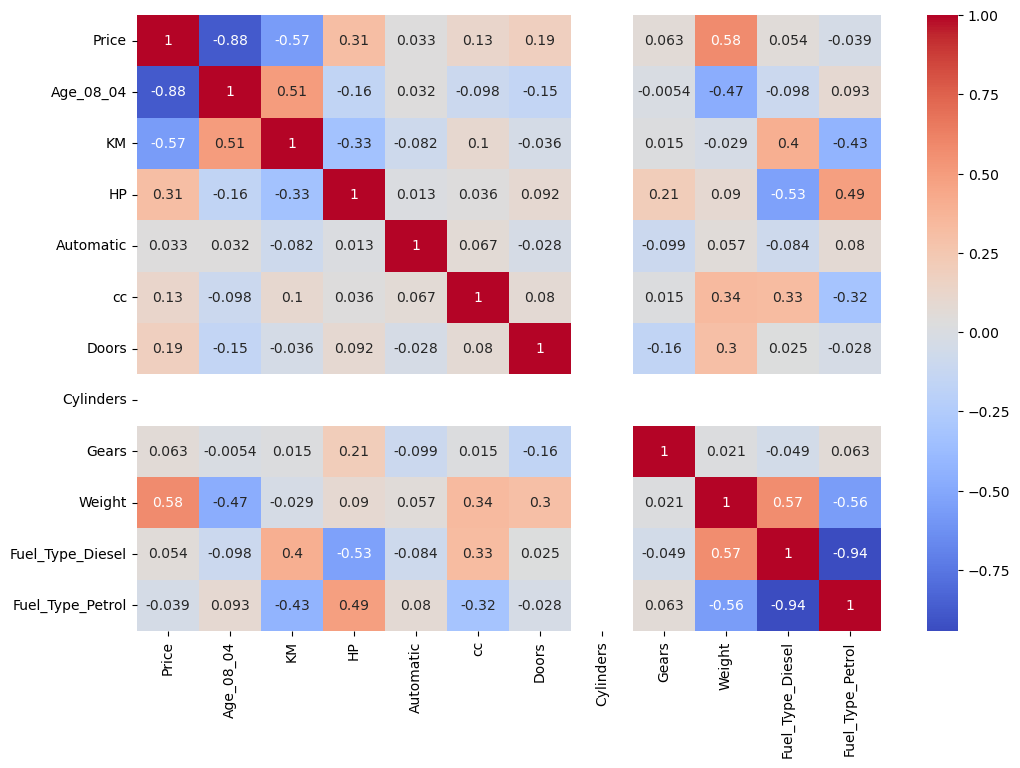

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


### Recursive Feature Elimination (RFE)
#### Use RFE from sklearn.feature_selection to remove less important features.

In [15]:
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=5)  
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]

### Lasso for Feature Selection
#### Lasso regression performs feature selection by shrinking coefficients.

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
important_features = X.columns[lasso.coef_ != 0]


## Hyperparameter Tuning for Ridge & Lasso
### To optimize Lasso and Ridge models, use cross-validation and GridSearchCV.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_

lasso = Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_

print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")
print(f"Best Lasso alpha: {lasso_cv.best_params_['alpha']}")

Best Ridge alpha: 100
Best Lasso alpha: 100


## Advanced Models
### Consider ensemble methods and polynomial regression regularization.

### Random Forest & Gradient Boosting

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

### Regularized Polynomial Regression
#### If polynomial regression overfits, apply Ridge/Lasso to higher-degree terms.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2  
poly_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
poly_ridge.fit(X_train, y_train)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.43725e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])

## Model Evaluation
#### Compare models using RMSE and R².

In [27]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

print("Linear Regression:", evaluate(mlr_model, X_test, y_test))

Linear Regression: (1484.2654153296517, 0.8348888040611082)


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

print("Linear Regression:", evaluate(mlr_model, X_test, y_test))
print("Best Ridge:", evaluate(best_ridge, X_test, y_test))
print("Best Lasso:", evaluate(best_lasso, X_test, y_test))
print("Random Forest:", evaluate(rf, X_test, y_test))
print("Gradient Boosting:", evaluate(gb, X_test, y_test))


Linear Regression: (1484.2654153296517, 0.8348888040611082)
Best Ridge: (1432.8685847163276, 0.8461256934275696)
Best Lasso: (1413.6071285272126, 0.8502348244260639)
Random Forest: (1084.0284064748694, 0.9119286380223923)
Gradient Boosting: (980.2619278309346, 0.9279825635846435)
